# Boston house price prediction

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:

- 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
- 'RM', 'LSTAT', 'PTRATIO' are the essential features for determining the house price ('MEDV'). The remaining non-relevant features have been excluded.
* RM: rooms; the average number of rooms among homes in the neighborhood
* LSTAT:  the percentage of homeowners in the neighborhood considered "lower class" (working poor)
* PTRATIO: the ratio of students to teachers in primary and secondary schools in the neighborhood
- The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.


Some considerations:
- Would you expect a home that has an 'RM' value(number of rooms) of 6 be worth more or less than a home that has an 'RM' value of 7?
- Would you expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an 'LSTAT' value of 20?
- Would you expect a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an 'PTRATIO' value of 15?

In [1]:
import pandas as pd
data = pd.read_csv("housing.csv")
print(data.shape) # sichergehen, dass man die richtige Datei erwischt hat
data.head()

(489, 4)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [2]:
# Kann bei vielen Features uebersichtlicher sein - vermeidet Scrollbar bei 20+ Features
data.head().transpose()

,0,1,2,3,4
RM,6.575,6.421,7.185,6.998,7.147
LSTAT,4.980,9.140,4.030,2.940,5.330
PTRATIO,15.300,17.800,17.800,18.700,18.700
MEDV,504000.000,453600.000,728700.000,701400.000,760200.000


In [4]:
# Kann das ganze Dataset ausgeben, mit irgendwelchen Parametern ist steuerbar wie viele Eintraege genau
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


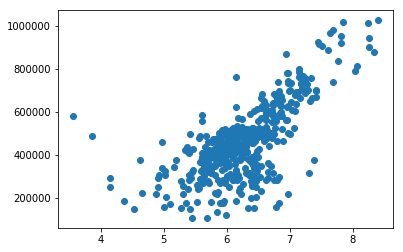

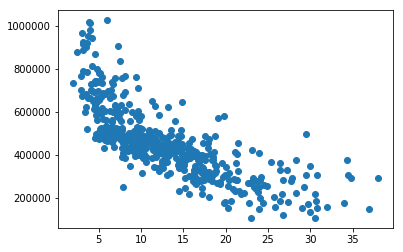

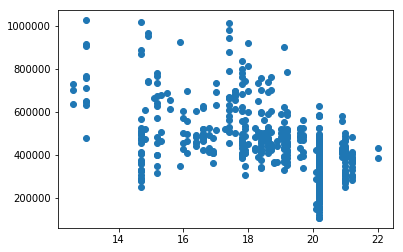

In [16]:
# Arbeiten jetzt mit 3 Dimensionen, um ein Gefuehl fuer die Daten zu bekommen 
# plotten wir jeweils ein Feature vs. den Preis
# Wir sehen vielleicht Korrelationen.

import matplotlib.pyplot as plt
%matplotlib inline

x_RM = data['RM']
x_LSTAT = data['LSTAT']
x_PTRATIO = data['PTRATIO']
y = data['MEDV']
plt.plot(x_RM, y, 'o')
plt.show()
plt.plot(x_LSTAT, y, 'o')
plt.show()
plt.plot(x_PTRATIO, y, 'o')
plt.show()

Bei der PTRATIO ist keine starke Korrelation erkennbar, anders als bei den anderen beiden Features

Bei Daten mit vielen Features/Datenpunkten macht es dann wenig Sinn, manuell nach Korrelationen zu suchen - ist der Sinn von ML, das zu automatisieren

## Some statistics

In [23]:
import numpy as np

# minimum house price in the data
minimum_price = np.min(y)

# maximum house price in the data
maximum_price = np.max(y)

# mean house price in the data
mean_price = np.mean(y)

# median house price in the data
median_price = np.median(y)

# standard deviation of house prices in the data
std_price = np.std(y)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


## Splitting the data into training and test data

Our next step requires that we take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, we will need to implement the following:

- Use train_test_split from sklearn.model_selection to shuffle and split the features and prices data into training and testing sets.

- Split the data into 80% training and 20% testing.

- Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [30]:
from sklearn import model_selection
# schneide MEDV von data aus
features = data.drop('MEDV', axis = 1) # axis = 1 <=> column
# hat jetzt nur noch 3 Spalten
print(features.shape)
# magie: splittet Daten in train/test und splittet y
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, y, train_size = 0.8)

# Notiere: Die Zeilen von X und y sind gleich [natuerlich noetig, um Vergleich ziehen zu koennen]
print(y_test.head())
print()
print(X_test.head())

(489, 3)
348    474600.0
9      396900.0
307    485100.0
232    462000.0
209    489300.0
Name: MEDV, dtype: float64

        RM  LSTAT  PTRATIO
348  6.112  12.67     20.2
9    6.004  17.10     15.2
307  6.382  10.36     18.4
232  6.897  11.38     16.6
209  5.888  13.51     16.4


In [ ]:
# Linear Regression
wir wenden Linear Regression auf den Datensatz an

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.6405336626779308

In [45]:
regressor.predict([[7, 5, 18.8]])

array([595315.57778604])

## DecisionTreeRegressor

In [62]:
# Baut Entscheidungsbaum auf, per default so tief, dass er die Trainingsdaten fast perfekt lernt. 
# Muessen daher Tiefe limitieren.
from sklearn.tree import DecisionTreeRegressor

def regress(depth):
    regressor = DecisionTreeRegressor(max_depth = depth)
    regressor.fit(X_train, y_train)
    print("depth: " + str(depth))
    print("train score: " + str(regressor.score(X_train, y_train))) 
    print("test score: " + str(regressor.score(X_test, y_test)))

for x in range(1, 7):
    regress(x)
    
print("Overfit:")
regress(20) # lernt Daten perfekt

depth: 1
train score: 0.4694816108393533
test score: 0.34196856528264485
depth: 2
train score: 0.7389014161622632
test score: 0.6011417178668976
depth: 3
train score: 0.8283212939678982
test score: 0.7310866073941416
depth: 4
train score: 0.8682419477386127
test score: 0.805454550690983
depth: 5
train score: 0.8936845470545096
test score: 0.7847008481683294
depth: 6
train score: 0.9234883524312053
test score: 0.7408064041810982
Overfit:
depth: 20
train score: 1.0
test score: 0.7188934835239003


In [63]:
regressor.predict([[7, 5, 18.8]])

array([732900.])

In [64]:
regressor.feature_importances_

array([0.2859313 , 0.66257515, 0.05149356])

In [75]:
for index, rec in X_test.iterrows():
    print(index)
    print(rec)
    pred = regressor.predict([rec])[0]
    print("pred\t${:.2f}".format(pred))
    print("value:\t${:.2f}".format(y[index]))
    print("delta:\t${:.2f}".format(abs(y[index] - pred)))
    print("------------------")

348
RM          6.112
LSTAT      12.670
PTRATIO    20.200
Name: 348, dtype: float64
pred	$455700.00
value:	$474600.00
delta:	$18900.00
------------------
9
RM          6.004
LSTAT      17.100
PTRATIO    15.200
Name: 9, dtype: float64
pred	$275100.00
value:	$396900.00
delta:	$121800.00
------------------
307
RM          6.382
LSTAT      10.360
PTRATIO    18.400
Name: 307, dtype: float64
pred	$478800.00
value:	$485100.00
delta:	$6300.00
------------------
232
RM          6.897
LSTAT      11.380
PTRATIO    16.600
Name: 232, dtype: float64
pred	$466200.00
value:	$462000.00
delta:	$4200.00
------------------
209
RM          5.888
LSTAT      13.510
PTRATIO    16.400
Name: 209, dtype: float64
pred	$413700.00
value:	$489300.00
delta:	$75600.00
------------------
296
RM          6.849
LSTAT       7.530
PTRATIO    18.400
Name: 296, dtype: float64
pred	$632100.00
value:	$592200.00
delta:	$39900.00
------------------
85
RM          6.63
LSTAT       6.53
PTRATIO    18.50
Name: 85, dtype: float64
pr

sklearn documentation: The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

## RandomForestRegressor—usually the best choice!

In [77]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth = 5)
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

/Users/dpape/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.904948464202761

In [79]:
regressor.score(X_test, y_test)

0.8068852307364642

In [81]:
regressor.predict([[7, 5, 18.8]])

array([680732.28842726])

In [80]:
regressor.feature_importances_

array([0.35053565, 0.61139912, 0.03806524])

Grosser Teil der Arbeit ist Datenaufbereitung, diesmal hatten wir relativ saubere Daten

Naechste Woche: Daten vorbereiten und bereinigen.

## RandomForestRegressor works also well without data splitting